## 1. Импортируем библиотеки и данные

In [248]:
import numpy as np
import pandas as pd
import datetime as dt
import os
import re
import unicodedata
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split

In [249]:
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/kaggle_task.csv
./data/main_task.csv
./data/sample_submission.csv


In [250]:
# Фиксируем RANDOM_SEED для воспроизводимости экспериментов:
RANDOM_SEED = 42

In [251]:
# Фиксируем версию пакетов, для воспроизводимости экспериментов:
!pip freeze > requirements.txt

### Посмотрим на наши данные:

In [252]:
DATA_DIR = './data/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [253]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [254]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [140]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [255]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [256]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [143]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [144]:
# ВАЖНО! Для корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


### Подробнее по признакам:

* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [146]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
4437,id_4437,London,"['Pizza', 'Italian', 'Fast Food']",7816.0,$,14.0,"[['Very nice', 'Fantastic!'], ['12/18/2017', '...",/Restaurant_Review-g186338-d5814973-Reviews-Pi...,d5814973,0,0.0
3410,id_3410,Berlin,NaN,5542.0,NaN,14.0,"[['lovely place', 'Great coffee!!!!!!!'], ['07...",/Restaurant_Review-g187323-d9597167-Reviews-Ei...,d9597167,0,0.0
26078,id_3296,Prague,"['Fast Food', 'Asian']",3303.0,$$ - $$$,19.0,"[['Shisha and Karaoke!', 'Lack of customer ser...",/Restaurant_Review-g274707-d4894352-Reviews-Ba...,d4894352,1,3.5
10746,id_963,Milan,"['Italian', 'Vegetarian Friendly']",965.0,$$ - $$$,306.0,"[['Great Food', 'Unfriendly owner, bad food'],...",/Restaurant_Review-g187849-d3181841-Reviews-Ri...,d3181841,1,4.0
8925,id_8925,Barcelona,"['Bar', 'Mediterranean', 'European', 'Spanish'...",1803.0,$$ - $$$,161.0,"[['Lunch in the sun', 'Tasty tapas, terrible i...",/Restaurant_Review-g187497-d4156838-Reviews-Re...,d4156838,0,0.0


In [261]:
# Смотрим количество пустых значений в столбцах:

for column in data.columns:
    if data[column].isna().value_counts()[False] != len(data):
        display(f'В столбце {column} обнаружено \
        {data[column].isna().value_counts()[True]} пустых значений.')
    else:
        display(f'В столбце {column} пустых значений не обнаружено.')

'В столбце Restaurant_id пустых значений не обнаружено.'

'В столбце City пустых значений не обнаружено.'

'В столбце Cuisine Style обнаружено         11590 пустых значений.'

'В столбце Ranking пустых значений не обнаружено.'

'В столбце Price Range обнаружено         17361 пустых значений.'

'В столбце Number of Reviews обнаружено         3200 пустых значений.'

'В столбце Reviews обнаружено         2 пустых значений.'

'В столбце URL_TA пустых значений не обнаружено.'

'В столбце ID_TA пустых значений не обнаружено.'

'В столбце sample пустых значений не обнаружено.'

'В столбце Rating пустых значений не обнаружено.'

## 2. Обработка признаков

In [148]:
# Модель может обучаться точько на числовых данных, поэтому можно сразу удалять столбцы, 
# котрые мы не будем использовать в дальнейшем:

data.drop(['Restaurant_id', 'URL_TA', 'ID_TA'], axis = 1, inplace=True)

In [149]:
# Признак 'City' нам понадобится в дальнейшем, так-что пока его обработку откладываем.

#### 2.1 Займемся признаком 'Cuisine Style':

In [150]:
# Заполним пропуски значением 'Other':

data['Cuisine Style'] = data['Cuisine Style'].fillna('Other')

In [151]:
# Превратим перечисление кухонь в список:

for i in ['\'', '[', ']']:
    data['Cuisine Style'] = data['Cuisine Style'].apply(
        lambda x: x.replace(i, ''))

data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: x.split(', '))

In [152]:
# Посмотрим сколько всего получилось кухонь:

Cusines_count = data['Cuisine Style'].explode().value_counts()

display(Cusines_count)

Vegetarian Friendly    14021
European               12561
Other                  11590
Mediterranean           7820
Italian                 7433
                       ...  
Polynesian                 2
Latvian                    1
Burmese                    1
Xinjiang                   1
Salvadoran                 1
Name: Cuisine Style, Length: 126, dtype: int64

In [153]:
# 126 типов кухонь, некоторые из которых встречаются всего несколько раз, это слишком много.
# Составим список самых редких кухонь (первый квартиль списка кухонь):

not_pop_cousine = []

for i in range(len(Cusines_count)):
    if Cusines_count[i] < Cusines_count.quantile(0.25):
        not_pop_cousine.append(Cusines_count.index[i])

In [154]:
# Заменим все редкие кухни на 'Other' и, если в одном ресторане станет несколько кухонь с одинаковым значением,
# объединим их в одну:

def replace_cousines(cousines):
    for i in range(len(cousines)):
        if cousines[i] in not_pop_cousine:
            cousines[i] = 'Other'
    return list(set(cousines))

data['Cuisine Style'] = data['Cuisine Style'].apply(replace_cousines)

In [155]:
# Чуть попозже из списка кухонь мы сделаем dummies-переменную.

#### 2.2 Займемся признаком 'Ranking':

<AxesSubplot:>

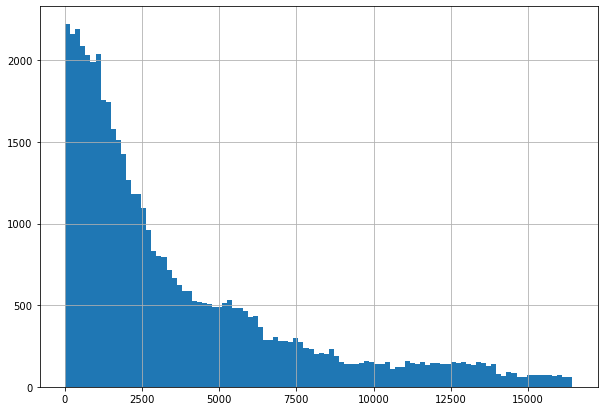

In [156]:
# Посмотрим на его распределение:

plt.rcParams['figure.figsize'] = (10,7)
data['Ranking'].hist(bins=100)

<AxesSubplot:>

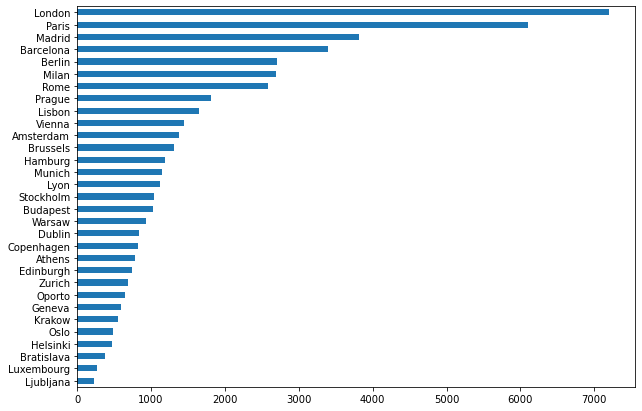

In [157]:
# Распределение слишком сильно смещено "влево", посмотрим с чем это связано.
# Для начала посмотрим сколько у нас ресторанов в разных городах:

data['City'].value_counts(ascending=True).plot(kind='barh')

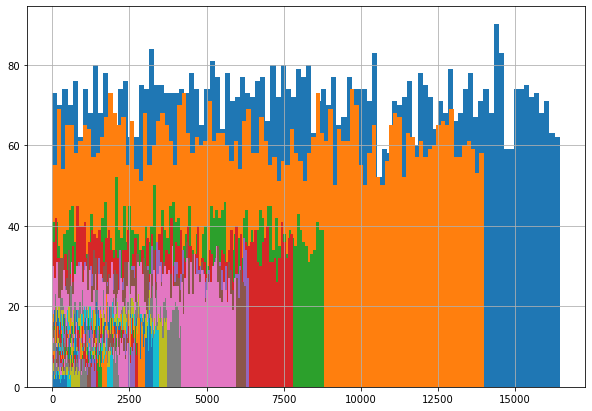

In [158]:
# Посмотрим на распределение признака для топ отдельных городов:
for x in (data['City'].value_counts()).index:
    data['Ranking'][data['City'] == x].hist(bins=100)
plt.show()

In [ ]:
# Получается что признак имеет нормальное распределение, просто в больших городах больше ресторанов,
# из-за мы этого имеем смещение. "Нормализуем" признак, разделив его для каждого ресторана
# в отдельном городе на количество ресторанов в этом городе.

rest_count = {}

for i in range(len(data['City'].value_counts().index)):
    rest_count[data['City'].value_counts().index[i]] = data['City'].value_counts()[
        data['City'].value_counts().index[i]]
    
for i in range(len(data)):
    data['Ranking'][i] = (data['Ranking'][i] / rest_count[(data['City'][i])])    

<AxesSubplot:>

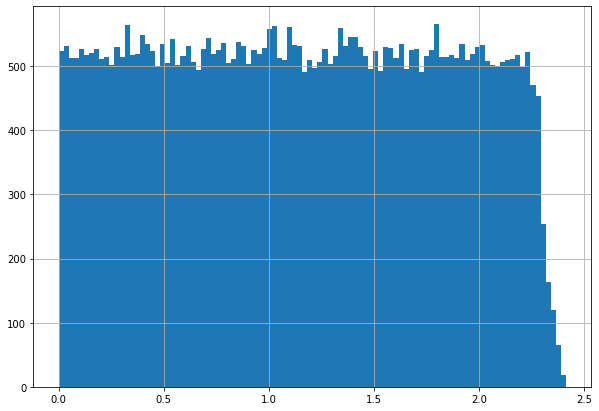

In [160]:
# Посмотрим как изменилось распределение:

plt.rcParams['figure.figsize'] = (10,7)
data['Ranking'].hist(bins=100)

In [161]:
# Распределение стало более "нормальным". Наверняка можно было придумать что-то поулчше, 
# но пока оставляем его таким.

#### 2.3 Займемся признаком 'Price Range':

In [162]:
# Посмотрим какие у нас есть значения цен:

data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [163]:
# Среднее значение самое популярное, заполним им пропуски в данных:

data['Price Range'] = data['Price Range'].fillna('$$ - $$$')

In [164]:
# Уровень цен это ранжируемый категориальный признак. Заменим его числовыми значениями от 1 до 3:

def price_change(price):
    if price == '$':
        return 1
    elif price == '$$ - $$$':
        return 2
    elif price == '$$$$':
        return 3

In [165]:
# Применяем нашу функцию:

data['Price Range'] = data['Price Range'].apply(price_change)

#### 2.4 Займемся признаком 'Number of Reviews':

In [166]:
# Заполним пустые значения медианным числом отзывов:

data['Number of Reviews'] = data['Number of Reviews'].fillna(
    data['Number of Reviews'].median())

In [167]:
# На всякий случай переведем число отзывов из float в int, т.к. оно точно не может быть дробным:

data['Number of Reviews'] = data['Number of Reviews'].apply(lambda x: int(x))

#### 2.5 Займемся признаком 'Reviews':

In [168]:
# Сначала заполним пропуски:

data['Reviews'] = data['Reviews'].fillna('[[], []]')

In [169]:
# Признак 'Reviews' содержит в себе как сами отзывы, так и их даты. Разделим их обработку на 2 части.
# Сначала займемся датами отзывов:

In [170]:
# Создаем функцию, которая возвращает число дней с последнего отзыва (на 22.04.2021).
# У нас возможны 3 варианта:
# 1. Нет отзывов и дат, тогда возвращаем 7782 (кол-во дней между 22.04.2021 и 01.01.2000).
# 2. Есть один отзыв и одна дата. Возвращаем разницу между этой датой и 22.04.2021.
# 3. Есть 2 отзыва с датами. Возвращаем разницу между бОльшей из дат и 22.04.2021.

def days_from_last_rev(review):
    if review == '[[], []]':         
        days = 7782                  
    else:
        for i in ['[[', ']]']:
            review = review.replace(i, '')
        review = review.split('], [')
        review = review[1]
        review = review[1 : -1]
        review = review.split('\', \'')
        for i in range(len(review)):
            review[i] = dt.datetime.strptime(review[i], '%m/%d/%Y')
        if len(review) > 1:
            if review[0] > review[1]:                
                review = review[0]
            else:
                review = review[1]
        else:
            review = review[0]
        days = (dt.datetime(2021, 4, 22, 0, 0) - review).days   
    return days

In [171]:
# Создадим отдельную колонку, в которую запишем результат применения функции, созданной выше:

data['Last_rev_days'] = data['Reviews'].apply(days_from_last_rev)

In [172]:
# Теперь займемся непосредственно отзывами. Создадим функцию которая "разберет" отзывы на отдельные слова.
# В дальнейшем из этих слов составим списки "положительных" и "отрицательных" слов 
# и подсчитаем их количество для каждого отдельного ресторана.

def rev_to_words(review):
    if review == '[[], []]':         
        return ['-']                  
    else:
        for i in ['[[', ']]']:
            review = review.replace(i, '')
        review = review.split('], [')
        review = review[0]
        for i in ['\'', ',']:
            review = review.replace(i, '')
        return re.sub(r"[^a-zA-Z]+ ", "", review).lower().split(' ')   

In [173]:
# Применяем нашу функцию непосредственно к столбцу 'Reviews':

data['Reviews'] = data['Reviews'].apply(rev_to_words)

In [174]:
# Создадим словарь из всех слов, используемых в отзывах, формата:
# {слово : кол-во использований слова}

words = {}

for i in range(len(data)):
    for word in data['Reviews'][i]:
        if word in words:
            words[word] += 1
        else:
            words[word] = 1

In [175]:
# Посмотрим сколько всего у нас различных слов в отзывах:

display(len(words.values()))

30836

In [176]:
# Выберем 300 самых популярных слов:

words_count = [i for i in words.values()]
words_count.sort(reverse = True)

popular_words = []

for key, value in words.items():
    if value >= words_count[299]:
        popular_words.append(key)
        
print(popular_words)

['-', 'very', 'good', 'dining', 'in', 'better', 'than', 'the', 'most', 'delicious', 'and', 'authentic', 'always', 'best', 'but', 'pricey', 'lunch', 'break', 'to', 'quick', 'bite', 'big', 'food', 'slow', 'service', 'pizza', 'drinks', 'are', 'top', 'a', 'bar', 'great', 'with', 'style', 'disappointing', 'you', 'welcome', 'at', 'this', 'yummy', 'beer', 'value', 'eat', 'nice', 'staff', 'lovely', 'location', 'i', 'from', 'quite', 'decent', 'pub', 'of', 'nothing', 'local', 'cozy', 'cute', 'on', 'atmosphere', 'amazing', 'loved', 'cosy', 'is', 'experience', 'friendly', 'bit', 'old', 'place', 'time', 'tapas', 'tasty', 'like', 'it', 'more', 'too', 'special', 'trip', 'out', 'city', 'place!', 'my', 'go', 'for', 'taste', 'spot', 'or', 'have', 'brunch', 'pleasant', 'expensive', 'fantastic', 'high', 'quality', 'neighborhood', 'coffee', 'do', 'worst', 'not', 'ok', 'wine', 'much', 'an', 'turkish', 'so', 'selection', 'food!', 'cafe', 'was', 'as', 'price', 'dinner', 'birthday', 'surprise', 'cocktails', 'a

In [177]:
# Составим списки "хороших" и "плохих" слов из наиболее популярных слов:

good_words = ['good', 'better', 'delicious', 'best', 'quick', 'top', 'great',
              'nice', 'lovely', 'cozy', 'cute', 'amazing', 'loved', 'friendly',
              'tasty', 'like', 'pleasant', 'fantastic', 'recommended', 'perfect',
              'outstanding', 'excellent', 'favourite', 'awesome', 'well',
              'wonderful', 'beautiful', 'enjoyable', 'super', 'reasonable',
              'affordable', 'welcoming', 'fine', 'fast', 'fabulous', 'favorite',
              'love', 'brilliant', 'pretty', 'interesting', 'charming', 'happy']

bad_words = ['pricey', 'slow', 'disappointing', 'expensive', 'worst', 'awful',
             'bad', 'terrible', 'rude', 'overpriced', 'avoid', 'horrible']

In [178]:
# "Хороших" слов получилось гораздо больше чем "плохих", возможно этому можно найти какое-то объяснение?

In [179]:
# Напишем функцию, возвращающую вместо списка слов в отзыве их числовой "эквивалент":
# 0 по умолчанию, +1 за каждое "хорошее" слово и -1 за каждое "плохое".

def review_rating(review):
    rating = 0
    for word in review:
        if word in good_words:
            rating += 1
        if word in bad_words:
            rating -= 1
    return rating

In [180]:
# Применим нашу функцию:

data['Reviews'] = data['Reviews'].apply(review_rating)

#### 2.5 Займемся признаком 'City':

In [181]:
# Сам по себе признык 'City' идеально подходит что-бы сделать из него dummies-переменную.
# Но сначала мы добавим в наш датасет 2 дополнительных признака, основанных на информации 
# о городе: является-ли он столицей или нет и его население. Всю информацию возьмем из
# открытых источникв в интернете.

In [182]:
# Получуаем списко всех городов в нашем датасете:

display(data['City'].unique())

array(['Paris', 'Helsinki', 'Edinburgh', 'London', 'Bratislava', 'Lisbon',
       'Budapest', 'Stockholm', 'Rome', 'Milan', 'Munich', 'Hamburg',
       'Prague', 'Vienna', 'Dublin', 'Barcelona', 'Brussels', 'Madrid',
       'Oslo', 'Amsterdam', 'Berlin', 'Lyon', 'Athens', 'Warsaw',
       'Oporto', 'Krakow', 'Copenhagen', 'Luxembourg', 'Zurich', 'Geneva',
       'Ljubljana'], dtype=object)

In [183]:
# Сделаем словарь, в котором для каждого города укажем столица он (1) или нет(0)

capital = {'Paris' : 1,
           'Stockholm' : 1,
           'London' : 1,
           'Berlin' : 1,
           'Munich' : 0,
           'Oporto' : 0, 
           'Milan' : 0,
           'Bratislava' : 1,
           'Vienna' : 1,
           'Rome' : 1,
           'Barcelona' : 0,
           'Madrid' : 1,
           'Dublin' : 1,
           'Brussels' : 1, 
           'Zurich' : 1,
           'Warsaw' : 1,
           'Budapest' : 1,
           'Copenhagen' : 1,
           'Amsterdam' : 1,
           'Lyon' : 0,
           'Hamburg' : 0,
           'Lisbon' : 1,
           'Prague' : 1,
           'Oslo' : 1,
           'Helsinki' : 1,
           'Edinburgh' : 0,
           'Geneva' : 0,
           'Ljubljana' : 1,
           'Athens' : 1,
           'Luxembourg' : 1,
           'Krakow' : 0
          }

In [184]:
# Сделаем словарь где укажем население для каждого из городов

population = {'Paris' : 2148327,
           'Stockholm' : 961609,
           'London' : 8908081,
           'Berlin' : 3644826,
           'Munich' : 1471508,
           'Oporto' : 237591, 
           'Milan' : 1378689,
           'Bratislava' : 437725,
           'Vienna' : 1897491,
           'Rome' : 2870500,
           'Barcelona' : 1664182,
           'Madrid' : 3266126,
           'Dublin' : 1173179,
           'Brussels' : 179277, 
           'Zurich' : 428737,
           'Warsaw' : 1790658,
           'Budapest' : 1752286,
           'Copenhagen' : 615993,
           'Amsterdam' : 872757,
           'Lyon' : 506615,
           'Hamburg' : 1841179,
           'Lisbon' : 505526,
           'Prague' : 1301132,
           'Oslo' : 673469,
           'Helsinki' : 655281,
           'Edinburgh' : 488100,
           'Geneva' : 200548,
           'Ljubljana' : 284355,
           'Athens' : 664046,
           'Luxembourg' : 114303,
           'Krakow' : 766683
          }

In [185]:
# Добавим к нашему датасету колонку 'Capital':

data['Capital'] = data['City'].apply(lambda x: capital[x])

In [186]:
# Добавим к нашему датасету колонку 'Population':

data['Population'] = data['City'].apply(lambda x: population[x])

#### 2.5 Dummies-переменные:

In [188]:
# Создаем dummies из городов

dummies_city = pd.get_dummies(data['City'], dummy_na=True)

In [190]:
# Создаем dummies из кухонь

dummies_cuisine = pd.get_dummies(
    data['Cuisine Style'].apply(pd.Series).stack()).sum(level=0)

In [192]:
# Присоединяем dummies с городами к основному датасету:

data = pd.concat([data, dummies_city], axis=1)

In [193]:
# И удаляем ненужный более столбец city:

data.drop(['City'], axis = 1, inplace=True)

In [194]:
# Присоединяем dummies с кухнями к основному датасету:

data = pd.concat([data, dummies_cuisine], axis=1)

In [195]:
# А в столбец с кухнями вместо их перечисления запишем их количество:

data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: len(x))

## 3. Проверяем что в итоге получилось

In [196]:
data

,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,sample,Rating,Last_rev_days,Capital,Population,...,Swiss,Taiwanese,Thai,Tibetan,Turkish,Vegan Options,Vegetarian Friendly,Venezuelan,Vietnamese,Wine Bar
0,2,2.122299,2,4,0,0,0.0,7782,1,2148327,...,0,0,0,0,0,0,0,0,0,0
1,5,0.223158,2,97,1,0,0.0,1234,1,655281,...,0,0,0,0,0,1,1,0,0,0
2,1,1.087248,2,28,1,0,0.0,1211,0,488100,...,0,0,0,0,0,0,1,0,0,0
3,5,0.232031,3,202,1,0,0.0,1233,1,8908081,...,0,0,0,0,0,0,1,0,0,0
4,6,0.097368,3,162,1,0,0.0,1169,1,437725,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,4,0.185598,2,79,1,1,4.5,1223,0,1378689,...,0,0,0,0,0,1,1,0,0,0
49996,5,1.038147,2,542,0,1,3.5,1218,1,2148327,...,0,0,0,0,0,0,1,0,0,0
49997,2,1.599226,2,4,1,1,4.5,1631,1,961609,...,0,0,0,0,0,0,0,0,0,0
49998,5,0.692973,2,70,0,1,4.0,1381,1,1790658,...,0,0,0,0,0,0,1,0,0,0


In [200]:
# Проверяем что не осталось пустых значений:

empty = True

for column in data.columns:
    if data[column].isna().value_counts()[False] != len(data):
        display(f'В столбце {column} обнаружено \
        {data[column].isna().value_counts()[True]} пустых значений.')
        empty = False
        
if empty:
    print('В датасете пустых значений не обнаружено.')

В датасете пустых значений не обнаружено.


## 4. Корреляция признаков

<AxesSubplot:>

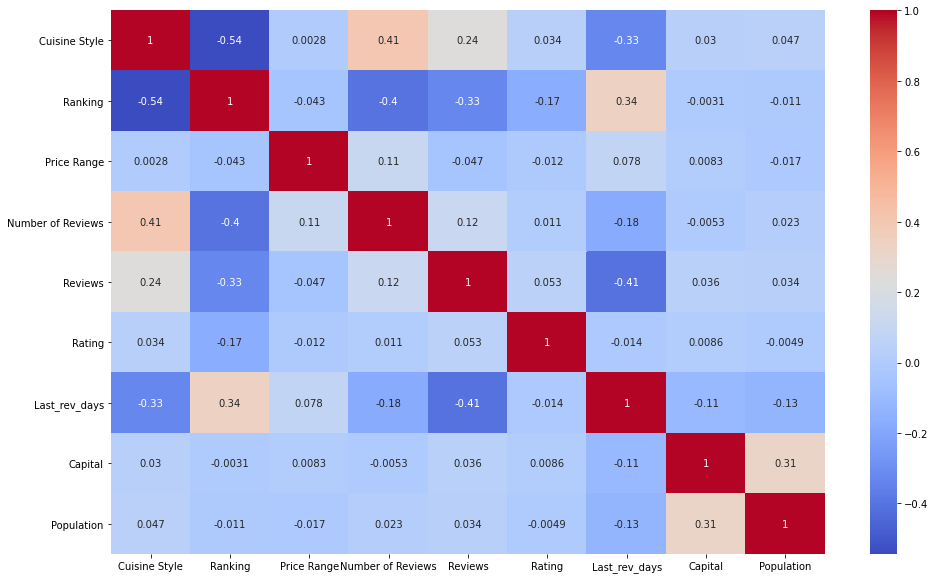

In [205]:
# Построим тепловую карту матрицы корреляций, исключив из нее города и кухни (иначе ничего не разобрать):

plt.rcParams['figure.figsize'] = (16, 10)
data_corr = data[['Cuisine Style', 'Ranking', 'Price Range', 'Number of Reviews',
                  'Reviews', 'Rating', 'Last_rev_days', 'Capital', 'Population']]
sns.heatmap(data_corr.corr(), annot=True, cmap='coolwarm')

In [207]:
# По графику видно, что слишком скоррелированных с целевой переменной признаков у нас нет.

## 5. Data Preprocessing

In [208]:
# Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [209]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, 
                      # мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [210]:
# Создаем единую функцию для предобработки данных:

def preproc_data(df_input):

    df_output = df_input.copy()

    # Убираем не нужные для модели признаки:
    df_output.drop(['Restaurant_id', 'ID_TA', 'URL_TA'], axis=1, inplace=True)

    # Заполняем пропуски:
    df_output['Cuisine Style'] = df_output['Cuisine Style'].fillna('Other')
    df_output['Price Range'] = df_output['Price Range'].fillna('$$ - $$$')
    df_output['Number of Reviews'] = data['Number of Reviews'].fillna(
        df_output['Number of Reviews'].median())
    df_output['Reviews'] = df_output['Reviews'].fillna('[[], []]')

    # Обрабатываем признак 'Cuisine Style':
    for i in ['\'', '[', ']']:
        df_output['Cuisine Style'] = df_output['Cuisine Style'].apply(
            lambda x: x.replace(i, ''))

    df_output['Cuisine Style'] = df_output['Cuisine Style'].apply(
        lambda x: x.split(', '))

    not_pop_cousine = []

    for i in range(len(Cusines_count)):
        if Cusines_count[i] < Cusines_count.quantile(0.25):
            not_pop_cousine.append(Cusines_count.index[i])

    def replace_cousines(cousines):
        for i in range(len(cousines)):
            if cousines[i] in not_pop_cousine:
                cousines[i] = 'Other'
        return list(set(cousines))

    df_output['Cuisine Style'] = df_output['Cuisine Style'].apply(
        replace_cousines)

    # Обрабатываем признак 'Ranking':
    rest_count = {}

    for i in range(len(df_output['City'].value_counts().index)):
        rest_count[df_output['City'].value_counts().index[i]] = df_output['City'].value_counts()[
            df_output['City'].value_counts().index[i]]

    for i in range(len(df_output)):
        df_output['Ranking'][i] = (
            df_output['Ranking'][i] / rest_count[(df_output['City'][i])])

    # Обрабатываем признак 'Price Range':
    def price_change(price):
        if price == '$':
            return 1
        elif price == '$$ - $$$':
            return 2
        elif price == '$$$$':
            return 3

    df_output['Price Range'] = df_output['Price Range'].apply(price_change)

    # Обрабатываем признак 'Number of Reviews':
    df_output['Number of Reviews'] = df_output['Number of Reviews'].apply(
        lambda x: int(x))

    # Обрабатываем признак 'Reviews':
    def days_from_last_rev(review):
        if review == '[[], []]':
            days = 7782
        else:
            for i in ['[[', ']]']:
                review = review.replace(i, '')
            review = review.split('], [')
            review = review[1]
            review = review[1: -1]
            review = review.split('\', \'')
            for i in range(len(review)):
                review[i] = dt.datetime.strptime(review[i], '%m/%d/%Y')
            if len(review) > 1:
                if review[0] > review[1]:
                    review = review[0]
                else:
                    review = review[1]
            else:
                review = review[0]
            days = (dt.datetime(2021, 4, 22, 0, 0) - review).days
        return days

    df_output['Last_rev_days'] = df_output['Reviews'].apply(days_from_last_rev)

    def rev_to_words(review):
        if review == '[[], []]':
            return ['-']
        else:
            for i in ['[[', ']]']:
                review = review.replace(i, '')
            review = review.split('], [')
            review = review[0]
            for i in ['\'', ',']:
                review = review.replace(i, '')
            return re.sub(r"[^a-zA-Z]+ ", "", review).lower().split(' ')

    df_output['Reviews'] = df_output['Reviews'].apply(rev_to_words)

    good_words = ['good', 'better', 'delicious', 'best', 'quick', 'top', 'great',
                  'nice', 'lovely', 'cozy', 'cute', 'amazing', 'loved', 'friendly',
                  'tasty', 'like', 'pleasant', 'fantastic', 'recommended', 'perfect',
                  'outstanding', 'excellent', 'favourite', 'awesome', 'well',
                  'wonderful', 'beautiful', 'enjoyable', 'super', 'reasonable',
                  'affordable', 'welcoming', 'fine', 'fast', 'fabulous', 'favorite',
                  'love', 'brilliant', 'pretty', 'interesting', 'charming', 'happy']

    bad_words = ['pricey', 'slow', 'disappointing', 'expensive', 'worst', 'awful',
                 'bad', 'terrible', 'rude', 'overpriced', 'avoid', 'horrible']

    def review_rating(review):
        rating = 0
        for word in review:
            if word in good_words:
                rating += 1
            if word in bad_words:
                rating -= 1
        return rating

    df_output['Reviews'] = df_output['Reviews'].apply(review_rating)

    # Добавляем данные по столицам и населению:
    capital = {'Paris': 1, 'Stockholm': 1, 'London': 1, 'Berlin': 1, 'Munich': 0,
               'Oporto': 0, 'Milan': 0, 'Bratislava': 1, 'Vienna': 1, 'Rome': 1,
               'Barcelona': 0, 'Madrid': 1, 'Dublin': 1, 'Brussels': 1, 'Zurich': 1,
               'Warsaw': 1, 'Budapest': 1, 'Copenhagen': 1, 'Amsterdam': 1,
               'Lyon': 0, 'Hamburg': 0, 'Lisbon': 1, 'Prague': 1, 'Oslo': 1,
               'Helsinki': 1, 'Edinburgh': 0, 'Geneva': 0, 'Ljubljana': 1,
               'Athens': 1, 'Luxembourg': 1, 'Krakow': 0}

    population = {'Paris': 2148327, 'Stockholm': 961609, 'London': 8908081,
                  'Berlin': 3644826, 'Munich': 1471508, 'Oporto': 237591,
                  'Milan': 1378689, 'Bratislava': 437725, 'Vienna': 1897491,
                  'Rome': 2870500, 'Barcelona': 1664182, 'Madrid': 3266126,
                  'Dublin': 1173179, 'Brussels': 179277, 'Zurich': 428737,
                  'Warsaw': 1790658, 'Budapest': 1752286, 'Copenhagen': 615993,
                  'Amsterdam': 872757, 'Lyon': 506615, 'Hamburg': 1841179,
                  'Lisbon': 505526, 'Prague': 1301132, 'Oslo': 673469,
                  'Helsinki': 655281, 'Edinburgh': 488100, 'Geneva': 200548,
                  'Ljubljana': 284355, 'Athens': 664046, 'Luxembourg': 114303,
                  'Krakow': 766683}

    df_output['Capital'] = df_output['City'].apply(lambda x: capital[x])

    df_output['Population'] = df_output['City'].apply(lambda x: population[x])

    # Создаем dummies-переменные:
    dummies_city = pd.get_dummies(df_output['City'], dummy_na=True)

    dummies_cuisine = pd.get_dummies(
        df_output['Cuisine Style'].apply(pd.Series).stack()).sum(level=0)

    df_output = pd.concat([df_output, dummies_city], axis=1)

    df_output.drop(['City'], axis=1, inplace=True)

    df_output = pd.concat([df_output, dummies_cuisine], axis=1)

    df_output['Cuisine Style'] = df_output['Cuisine Style'].apply(
        lambda x: len(x))

    # Возвращаем подготовленный датасет:
    return df_output

In [213]:
# Проверяем что функция работает правильно:

df_preproc = preproc_data(data)
df_preproc.sample(10)

,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,sample,Rating,Last_rev_days,Capital,Population,...,Swiss,Taiwanese,Thai,Tibetan,Turkish,Vegan Options,Vegetarian Friendly,Venezuelan,Vietnamese,Wine Bar
35951,1,1.356661,1,3,1,1,4.5,1485,0,1841179,...,0,0,0,0,0,0,0,0,0,0
29074,2,1.619679,1,32,2,1,3.5,1249,1,2148327,...,0,0,0,0,0,0,0,0,0,0
372,2,0.868330,2,32,0,0,0.0,1217,1,1897491,...,0,0,0,0,0,0,0,0,0,0
23061,4,0.853499,1,103,1,1,4.5,1268,1,872757,...,0,0,0,0,0,1,1,0,0,0
39575,1,1.813708,2,6,0,1,4.0,1925,1,8908081,...,0,0,0,0,0,0,0,0,0,0
26054,4,0.889650,2,51,0,1,4.0,1418,1,179277,...,0,0,0,0,0,0,1,0,0,0
34688,1,2.203667,2,19,2,1,3.0,1409,1,2148327,...,0,0,0,0,0,0,0,0,0,0
2079,7,0.353020,2,678,1,0,0.0,1201,0,488100,...,0,0,0,0,0,1,1,0,0,0
15684,6,1.074344,2,55,3,1,4.0,1278,1,872757,...,0,0,0,0,0,0,0,0,0,0
25422,1,1.929793,2,6,1,1,3.5,1255,1,8908081,...,0,0,0,0,1,0,0,0,0,0


In [214]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 137 entries, Cuisine Style to Wine Bar
dtypes: float64(2), int64(8), uint8(127)
memory usage: 9.9 MB


In [215]:
empty = True

for column in df_preproc.columns:
    if df_preproc[column].isna().value_counts()[False] != len(df_preproc):
        display(f'В столбце {column} обнаружено \
        {df_preproc[column].isna().value_counts()[True]} пустых значений.')
        empty = False
        
if empty:
    print('В датасете пустых значений не обнаружено.')

В датасете пустых значений не обнаружено.


In [ ]:
# Похоже что все в порядке, функция работает как надо.

In [216]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

In [217]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED)

In [218]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 136), (40000, 136), (40000, 135), (32000, 135), (8000, 135))

## 6. Model 

In [219]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [220]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(
    n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [221]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


In [225]:
# В исходном датасете все значения рейтинга кратны 0.5, а на выходе нашей модели нет.
# Создадим функцию для округления:

def round_rate(rating):
    return np.round(rating * 2) / 2

y_pred = round_rate(y_pred) 

In [247]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.1748125


<AxesSubplot:>

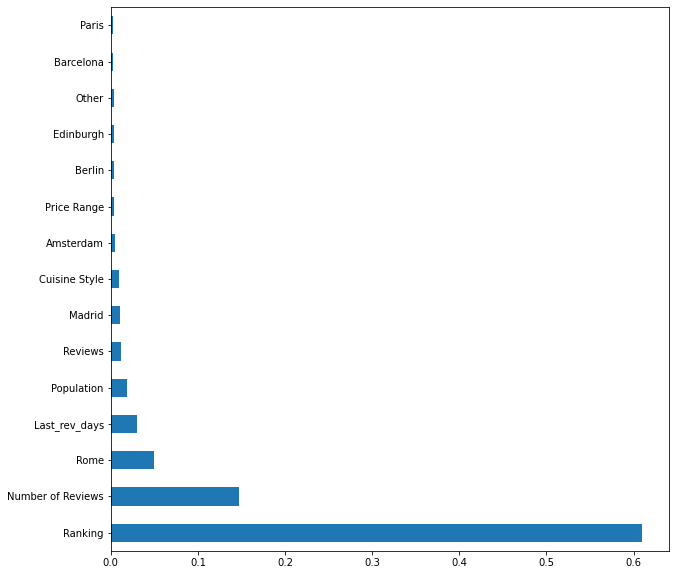

In [223]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

## 7. Submission

In [ ]:
# Подготовим submission для соревнования на kaggle:

In [ ]:
test_data = test_data.drop(['Rating'], axis=1)

In [242]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


In [243]:
predict_submission = round_rate(predict_submission)

In [245]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.0
1,id_1,4.5
2,id_2,4.5
3,id_3,4.5
4,id_4,4.5
5,id_5,4.5
6,id_6,3.0
7,id_7,1.5
8,id_8,4.0
9,id_9,4.5
